# **Laboratorijska vježba 6**: Zadaci za samostalni rad

## **Predviđanje preživaljvanja u potopu Titanika**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o putnicima Titanika te informaciju jesu li preživjeli potop. Ovaj skup podataka jedan od najpopularnijih skupova na stranici Kaggle jer dobro služi za uvođenje u rješavanje problema klasifikacije. Skup podataka sadrži sljedeće značajke:

* name - naziv putnika
* sex - spol putnika
* dob - dob putnika
* sibsp - broj braće/sestara/supružnika putnika na brodu
* parch - broj roditelja/djece putnika na brodu
* ticket - broj karte putnika
* fare - cijena karte putnika
* cabin - broj kabine putnika
* embarked - luka ukrcaja putnika

te izlaznu varijablu:

* survived - informacija je li putnik preživio katastrofu ili ne.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [ ]:
titanic = pd.read_csv('Data/titanic.csv')
titanic.head(5)

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,Allen,Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S
1,Allison,Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S
0,Allison,Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S
0,Allison,Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S
0,Allison,Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S


In [ ]:
print(titanic['survived'].dtypes)

object


## **Zadatak 1: Istraživanje skupa podataka**

Istražite skup podataka na način da izračunate deskriptivnu statistiku za izlaznu varijablu. Prokomentirajte koji je udio preživjelih u potonuću Titanika.

In [ ]:
titanic.rename(columns = {'survived':'last_name'}, inplace = True)
titanic['survived'] = titanic.index
print(titanic['survived'].dtypes)

int64


In [ ]:
#Deskriptivna statistika
titanic['survived'].describe()

count    1309.000000
mean        0.381971
std         0.486055
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: survived, dtype: float64

In [ ]:
titanic['survived'].value_counts(normalize=True)

0    0.618029
1    0.381971
Name: survived, dtype: float64

In [ ]:
#Preživjelih je 38.1971%

Nacrtajte dijagram raspršenosti između izlazne varijable i svakog pojedinog stupca u skupu podataka. Pomoć: možete koristiti matricu dijagrama raspršenosti iz biblioteke pandas.

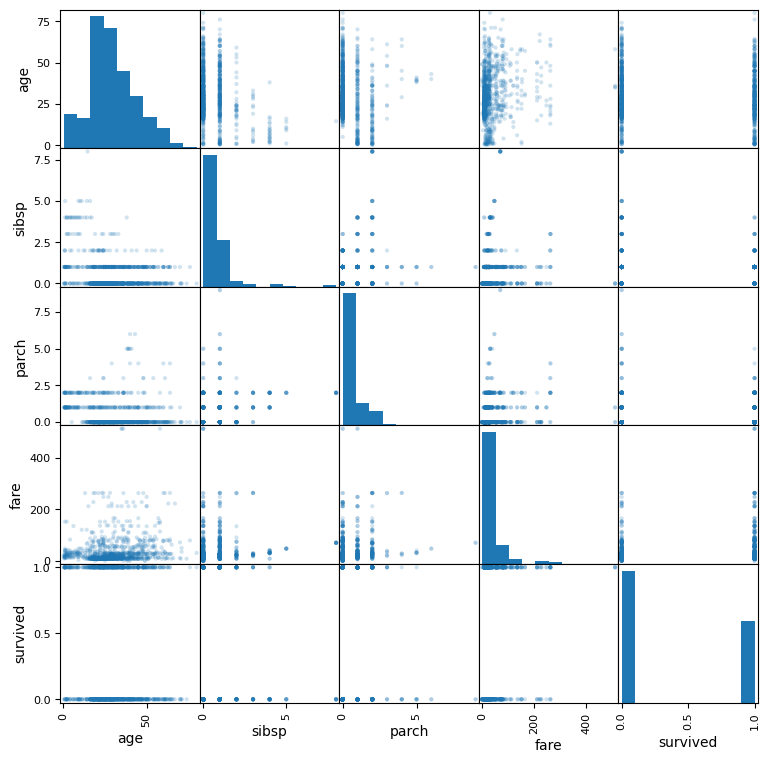

In [ ]:
pd.plotting.scatter_matrix(titanic, alpha=0.2, figsize=(9,9),diagonal='hist')
plt.show()

Odaberite značajke koje su po Vašem mišljenju bitne za klasifikaciju preživjelih i preminulih putnika. Kategoričke stupce pretvorite u numeričke pomoću *get_dummies()* funkcije iz biblioteke pandas. Provjerite ima li nedostajućih vrijednosti u nekom od stupaca te ih popunite na prikladan način (prosječna vrijednost, medijan, najčešća vrijednost,...). 

In [ ]:
print(titanic.isnull().sum())

last_name       0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
survived        0
dtype: int64


In [ ]:
titanic=pd.get_dummies(titanic, columns=['sex', 'embarked', 'cabin'])

In [ ]:
#Nedostajuće podatke sam popunio sa srednjom vrijednosti
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic['fare'].fillna(titanic['fare'].mean(), inplace=True)

In [ ]:
print(titanic.isnull().sum())

last_name    0
name         0
age          0
sibsp        0
parch        0
            ..
cabin_F33    0
cabin_F38    0
cabin_F4     0
cabin_G6     0
cabin_T      0
Length: 199, dtype: int64


Zatim podijelite skup podataka na trening i test (u omjeru 70-30). Pripazite na to da u podskupovima za trening i test bude jednak **omjer** preživjelih i preminulih putnika.

In [ ]:
from sklearn.model_selection import train_test_split

X = titanic.drop('survived', axis=1)
y = titanic['survived']


X = pd.get_dummies(X)
X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

print("Postotak prezivjelih u train podacima je ", y_train.mean()*100)
print("Postotak prezivjelih u test podacima je ", y_test.mean()*100)


Postotak prezivjelih u train podacima je  38.209606986899566
Postotak prezivjelih u test podacima je  38.16793893129771


In [ ]:
# Postotak prezivjelih u train podacima je  38.209606986899566
# Postotak prezivjelih u test podacima je  38.16793893129771

## **Zadatak 2: Logistička regresija**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

Na podskupu za trening istrenirajte model algoritma logističke regresije. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test. 

In [ ]:
#CAC - 
#Precision govori o tome koliko je precizan/točan vaš model od onih predviđenih pozitivnih, koliko je njih stvarno pozitivno.
#Recall zapravo izračunava koliko stvarnih pozitivnih stvari naš model hvata tako što ga označava kao pozitivno (pravo pozitivno).
#F1 rezultat je potreban kada želite pronaći ravnotežu između preciznosti i recall-a

In [ ]:
model = LogisticRegression()

model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred_test= model.predict(X_test)

print("Train podaci: ")
print("Accuracy is : ", accuracy_score(y_train, y_pred_train))
print("Precision is: ", precision_score(y_train, y_pred_train))
print("Recall is: ", recall_score(y_train, y_pred_train))
print("F1 is: ", f1_score(y_train, y_pred_train))
print()
print("Test podaci: ")
print("Accuracy is: ", accuracy_score(y_test, y_pred_test))
print("Precision is: ", precision_score(y_test, y_pred_test))
print("Recall is: ", recall_score(y_test, y_pred_test))
print("F1 is: ", f1_score(y_test, y_pred_test))

Train podaci: 
Accuracy is :  0.9410480349344978
Precision is:  0.9868421052631579
Recall is:  0.8571428571428571
F1 is:  0.9174311926605504

Test podaci: 
Accuracy is:  0.7964376590330788
Precision is:  0.7916666666666666
Recall is:  0.6333333333333333
F1 is:  0.7037037037037038


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistička regresija koristi prag vjerojatnosti kako bi odlučila u koju klasu treba svrstati primjerak. U nekim slučajevima, želimo razumjeti kako se model ponaša na različitim razinama ovog praga. Iscrtajte ROC krivulju na temelju stvarnih vrijednosti izlazne varijable i predviđenih vjerojatnosti oznaka klasa koje daje logistička regresija (*predict_proba*). Izračunajte površinu ispod krivulje, odnosno vrijednost mjere AUC. 

Vrijednost mjere AUC je 0.8545404663923182


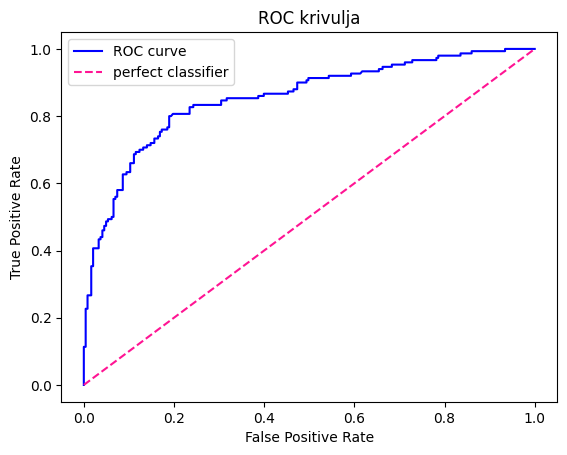

In [ ]:
y_predict_proba = model.predict_proba(X_test)
y_predict_proba=y_predict_proba[:, 1]



fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)


roc_auc_s = auc(fpr, tpr)
print("Vrijednost mjere AUC je", roc_auc_s)


plt.plot(fpr, tpr, color='blue', label='ROC curve' % roc_auc_s)
plt.plot([0, 1], [0, 1], linestyle='--', color='deeppink', label='perfect classifier')
plt.title('ROC krivulja')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## **Zadatak 3: Stroj potpornih vektora**

Na podskupu za trening istrenirajte model algoritma SVM s linearnom jezgrom. Ispišite jednadžbu granice između klasa te ju protumačite. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test.

In [ ]:
from sklearn.svm import SVC

modelSVC = SVC(kernel='linear')
modelSVC.fit(X_train, y_train)

n = -modelSVC.coef_[0][0] / modelSVC.coef_[0][1]
o = -modelSVC.intercept_[0] / modelSVC.coef_[0][1]

print("y = {:f}x + {:f}".format(n, o))

y = -0.084708x + 1.503530


In [ ]:
#nagib i odsjek na x osi

In [ ]:
y_svm_pred_train = modelSVC.predict(X_train)
y_svm_pred_test = modelSVC.predict(X_test)

print("Train podaci: ")
print("Accuracy is: ", accuracy_score(y_train, y_svm_pred_train))
print("Precision is: ", precision_score(y_train, y_svm_pred_train))
print("Recall is: ", recall_score(y_train, y_svm_pred_train))
print("F1 is: ", f1_score(y_train, y_svm_pred_train))
print()
print("Test podaci: ")
print("Accuracy is: ", accuracy_score(y_test, y_svm_pred_test))
print("Precision is: ", precision_score(y_test, y_svm_pred_test))
print("Recall is: ", recall_score(y_test, y_svm_pred_test))
print("F1 is: ", f1_score(y_test, y_svm_pred_test))

Train podaci: 
Accuracy is:  0.9989082969432315
Precision is:  1.0
Recall is:  0.9971428571428571
F1 is:  0.9985693848354792

Test podaci: 
Accuracy is:  0.8142493638676844
Precision is:  0.8130081300813008
Recall is:  0.6666666666666666
F1 is:  0.7326007326007327


Istražite učinkovitost algoritma SVM s različitim jezgrama (polinomijalne s različitim stupnjem te radijalne funkcije). Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te usporedite rezultate u odnosu na rezultate dobivene s linearnom jezgrom.

In [ ]:
#polimijalna jezgra
modelPOLY = SVC(kernel='poly', degree=2)
modelPOLY.fit(X_train, y_train)

y_poly_pred_train = modelPOLY.predict(X_train)
y_poly_pred_test = modelPOLY.predict(X_test)

print("Train podaci: ")
print("Accuracy is: ", accuracy_score(y_train, y_poly_pred_train))
print("Precision is: ", precision_score(y_train, y_poly_pred_train))
print("Recall is: ", recall_score(y_train, y_poly_pred_train))
print("F1 is: ", f1_score(y_train, y_poly_pred_train))
print()
print("Test podaci is: ")
print("Accuracy is: ", accuracy_score(y_test, y_poly_pred_test))
print("Precision is: ", precision_score(y_test, y_poly_pred_test))
print("Recall is: ", recall_score(y_test, y_poly_pred_test))
print("F1 is: ", f1_score(y_test, y_poly_pred_test))

Train podaci: 
Accuracy is:  0.6419213973799127
Precision is:  0.72
Recall is:  0.10285714285714286
F1 is:  0.18

Test podaci is: 
Accuracy is:  0.638676844783715
Precision is:  0.7222222222222222
Recall is:  0.08666666666666667
F1 is:  0.15476190476190477


In [ ]:
#radijalna
modelrbf = SVC(kernel='rbf')
modelrbf.fit(X_train, y_train)

y_rbf_pred_train = modelrbf.predict(X_train)
y_rbf_pred_test = modelrbf.predict(X_test)

print("Train podaci: ")
print("Accuracy is: ", accuracy_score(y_train, y_rbf_pred_train))
print("Precision is: ", precision_score(y_train, y_rbf_pred_train))
print("Recall is: ", recall_score(y_train, y_rbf_pred_train))
print("F1 is: ", f1_score(y_train, y_rbf_pred_train))
print()
print("Test podaci: ")
print("Accuracy is: ", accuracy_score(y_test, y_rbf_pred_test))
print("Precision is: ", precision_score(y_test, y_rbf_pred_test))
print("Recall is: ", recall_score(y_test, y_rbf_pred_test))
print("F1 is: ", f1_score(y_test, y_rbf_pred_test))

Train podaci: 
Accuracy is:  0.6812227074235808
Precision is:  0.6421568627450981
Recall is:  0.3742857142857143
F1 is:  0.47292418772563183

Test podaci: 
Accuracy is:  0.6666666666666666
Precision is:  0.6043956043956044
Recall is:  0.36666666666666664
F1 is:  0.45643153526970953


Istražite učinkovitost algoritma SVM sa složenijim jezgrama kada se pri njegovu treniranju koristi regularizacija. Isprobajte nekoliko vrijednosti za koeficijent regularizacije te prokomentirajte dobivene rezultate. 

In [ ]:
Covi = [0.2, 1, 50, 59.9]


for C in Covi:
    model_slozeni = SVC(kernel='rbf', C=C)
    model_slozeni.fit(X_train, y_train)

    y_slozeni_train_pred = model_slozeni.predict(X_train)
    y_slozeni_test_pred = model_slozeni.predict(X_test)


    print()
    print(f"C je {C}")
    print("Train podaci: ")
    print(f"Accuracy is: ", accuracy_score(y_train, y_slozeni_train_pred))
    print(f"Precision is: ", precision_score(y_train, y_slozeni_train_pred))
    print(f"Recall is: ", recall_score(y_train, y_slozeni_train_pred))
    print(f"F1 is: ", f1_score(y_train, y_slozeni_train_pred))
    print()
    print(f"Test podaci: ")
    print(f"Accuracy is: ", accuracy_score(y_test, y_slozeni_test_pred))
    print(f"Precision is: ", precision_score(y_test, y_slozeni_test_pred))
    print(f"Recall is: ", recall_score(y_test, y_slozeni_test_pred))
    print(f"F1 is: ", f1_score(y_test, y_slozeni_test_pred))


C je 0.2
Train podaci: 
Accuracy is:  0.6648471615720524
Precision is:  0.6319018404907976
Recall is:  0.29428571428571426
F1 is:  0.4015594541910331

Test podaci: 
Accuracy is:  0.6921119592875318
Precision is:  0.6986301369863014
Recall is:  0.34
F1 is:  0.45739910313901355

C je 1
Train podaci: 
Accuracy is:  0.6812227074235808
Precision is:  0.6421568627450981
Recall is:  0.3742857142857143
F1 is:  0.47292418772563183

Test podaci: 
Accuracy is:  0.6666666666666666
Precision is:  0.6043956043956044
Recall is:  0.36666666666666664
F1 is:  0.45643153526970953

C je 50
Train podaci: 
Accuracy is:  0.7794759825327511
Precision is:  0.7078651685393258
Recall is:  0.72
F1 is:  0.7138810198300284

Test podaci: 
Accuracy is:  0.7837150127226463
Precision is:  0.7372262773722628
Recall is:  0.6733333333333333
F1 is:  0.7038327526132405

C je 59.9
Train podaci: 
Accuracy is:  0.7849344978165939
Precision is:  0.71671388101983
Recall is:  0.7228571428571429
F1 is:  0.7197724039829304

Test p

In [ ]:
#Prema dobivenim vrijednostima, vidim da je najbolji model onaj sa većim koeficijentom regularizacije i za test i za trening podatke
#no recall, koji mjeri omjer broja točno pozitivno klasificiranih uzoraka i ukupnog broja pozitivnih uzoraka je bolji za model kojemu je koeficijen regularizacije 50

## **Zadatak 4: Algoritam najbližih susjeda**

Na podskupu za trening istrenirajte algoritam KNN s različitim postavkama parametra $k$. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kovi = [1, 3, 11]
train_results=[]
test_results=[]


for k in kovi:
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    modelKNN.fit(X_train, y_train)

    y_pred_train = modelKNN.predict(X_train)
    y_pred_test = modelKNN.predict(X_test)

    cac_tr = accuracy_score(y_train, y_pred_train)
    train_results.append(cac_tr)
    precision_tr = precision_score(y_train, y_pred_train)
    recall_tr = recall_score(y_train, y_pred_train)
    f1_tr = f1_score(y_train, y_pred_train)

    cac_te = accuracy_score(y_test, y_pred_test)
    test_results.append(cac_te)
    precision_te = precision_score(y_test, y_pred_test)
    recall_te = recall_score(y_test, y_pred_test)
    f1_te= f1_score(y_test, y_pred_test)


    print()
    print()
    print(f"k je {k}")
    print("Train podaci is: ")
    print("Accuracy is: ", cac_tr)
    print("Precision is: ", precision_tr)
    print("Recall is: ",recall_tr )
    print("F1 is:  ", f1_tr)
    print()
    print("Test podaci: ")
    print("Accuracy is: ", cac_te)
    print("Precision is: ", precision_te)
    print("Recall is: ",recall_te )
    print("F1 is: ",f1_te )



k je 1
Train podaci is: 
Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 is:   1.0

Test podaci: 
Accuracy is:  0.6590330788804071
Precision is:  0.5540540540540541
Recall is:  0.5466666666666666
F1 is:  0.5503355704697985


k je 3
Train podaci is: 
Accuracy is:  0.8231441048034934
Precision is:  0.7781065088757396
Recall is:  0.7514285714285714
F1 is:   0.7645348837209303

Test podaci: 
Accuracy is:  0.6768447837150128
Precision is:  0.5782312925170068
Recall is:  0.5666666666666667
F1 is:  0.5723905723905724


k je 11
Train podaci is: 
Accuracy is:  0.7467248908296943
Precision is:  0.6993243243243243
Recall is:  0.5914285714285714
F1 is:   0.6408668730650154

Test podaci: 
Accuracy is:  0.6997455470737913
Precision is:  0.625
Recall is:  0.5333333333333333
F1 is:  0.5755395683453237


In [ ]:
#sto  model ima manji k, to ima veci accuracy, za trening podatke
#no za test podatke, najveci accuracy model je onaj sa sto vecim k(medutim recall je tu  najmanji )
#sto je k manji, slozeniji je model

Iscrtajte ovisnost mjere CAC o veličini susjedstva ($k$) za podskupove za trening i test. Koristite linijski dijagram.

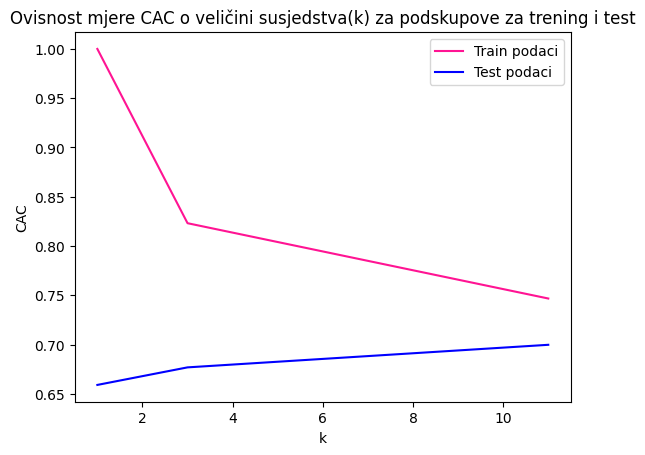

In [ ]:
plt.plot(kovi, train_results, label='Train podaci', c='deeppink')
plt.plot(kovi, test_results, label='Test podaci', c='b')
plt.title('Ovisnost mjere CAC o veličini susjedstva(k) za podskupove za trening i test')
plt.xlabel('k')
plt.ylabel('CAC')
plt.legend()
plt.show()

In [ ]:
#Prema grafu, što je veći k, to je model ima veći CAC za testne podatke
#Medutim, CAC je manji za što veće k

## **Zadatak 5: Stablo odluke**

Na podskupu za trening istrenirajte algoritam DT s različitim postavkama za dubinu stabla. Izračunajte mjere CAC, Precision, Recall i F1 na podskupu za trening i test te prokomentirajte dobivene rezultate.



In [ ]:
from sklearn import tree
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

dubine=[1,5,20]
train_resultsTREE=[]
test_resultsTREE=[]

for dubina in dubine:
    modelTREE =  DecisionTreeClassifier(max_depth=dubina, random_state=42)
    modelTREE.fit(X_train, y_train)


    y_tree_pred_train = modelTREE.predict(X_train)
    y_tree_pred_test = modelTREE.predict(X_test)

    cac_train = accuracy_score(y_train, y_tree_pred_train)
    train_resultsTREE.append(cac_train)
    precision_train = precision_score(y_train, y_tree_pred_train)
    recall_train = recall_score(y_train, y_tree_pred_train)
    f1_train = f1_score(y_train, y_tree_pred_train)

    cac_test = accuracy_score(y_test, y_tree_pred_test)
    test_resultsTREE.append(cac_test)
    precision_test = precision_score(y_test, y_tree_pred_test)
    recall_test = recall_score(y_test, y_tree_pred_test)
    f1_test = f1_score(y_test, y_tree_pred_test)


    print()
    print()
    print(f"dubina je {dubina}")
    print("Train podaci is: ")
    print("Accuracy is: ", cac_train)
    print("Precision is: ", precision_train)
    print("Recall is: ",recall_train )
    print("F1 is: ", f1_train)
    print()
    print("Test podaci: ")
    print("Accuracy is: ", cac_test)
    print("Precision is: ", precision_test)
    print("Recall is: ",recall_test )
    print("F1 is: ",f1_test )




dubina je 1
Train podaci is: 
Accuracy is:  0.7794759825327511
Precision is:  0.7202380952380952
Recall is:  0.6914285714285714
F1 is:  0.7055393586005831

Test podaci: 
Accuracy is:  0.7811704834605598
Precision is:  0.7461538461538462
Recall is:  0.6466666666666666
F1 is:  0.6928571428571428


dubina je 5
Train podaci is: 
Accuracy is:  0.8395196506550219
Precision is:  0.8201892744479495
Recall is:  0.7428571428571429
F1 is:  0.7796101949025488

Test podaci: 
Accuracy is:  0.7811704834605598
Precision is:  0.7807017543859649
Recall is:  0.5933333333333334
F1 is:  0.6742424242424243


dubina je 20
Train podaci is: 
Accuracy is:  0.9683406113537117
Precision is:  1.0
Recall is:  0.9171428571428571
F1 is:  0.9567809239940387

Test podaci: 
Accuracy is:  0.811704834605598
Precision is:  0.8166666666666667
Recall is:  0.6533333333333333
F1 is:  0.725925925925926


In [ ]:
#sto  model ima vecu dubinu, to ima veci accuracy, za trening podatke
#no za test podatke, najveci accuracy -> model koji ima dubinu 5 

Iscrtajte ovisnost mjere CAC o dubini stabla za podskupove za trening i test. Koristite linijski dijagram.

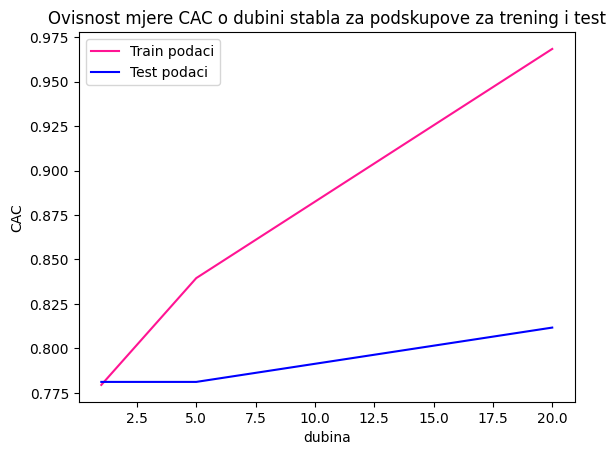

In [ ]:
plt.plot(dubine, train_resultsTREE, label='Train podaci', c='deeppink')
plt.plot(dubine, test_resultsTREE, label='Test podaci', c='b')
plt.title('Ovisnost mjere CAC o dubini stabla za podskupove za trening i test')
plt.xlabel('dubina')
plt.ylabel('CAC')
plt.legend()
plt.show()

In [ ]:
#Što je dubina veća to je i CAC veći